In [1]:
# Importar as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carrega o dataset
mnist = keras.datasets.mnist
# Carrega os dados de treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Mostra as caracteristicas do dataset
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


0


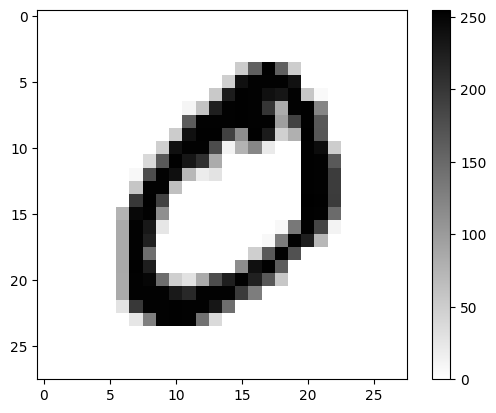

In [4]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])

0


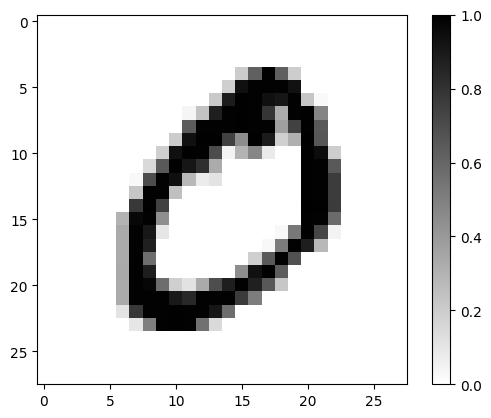

In [5]:
# Normalizando a escala de cinza para ficar entre 0 e 1
train_images = train_images/255
test_images = test_images/255
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])


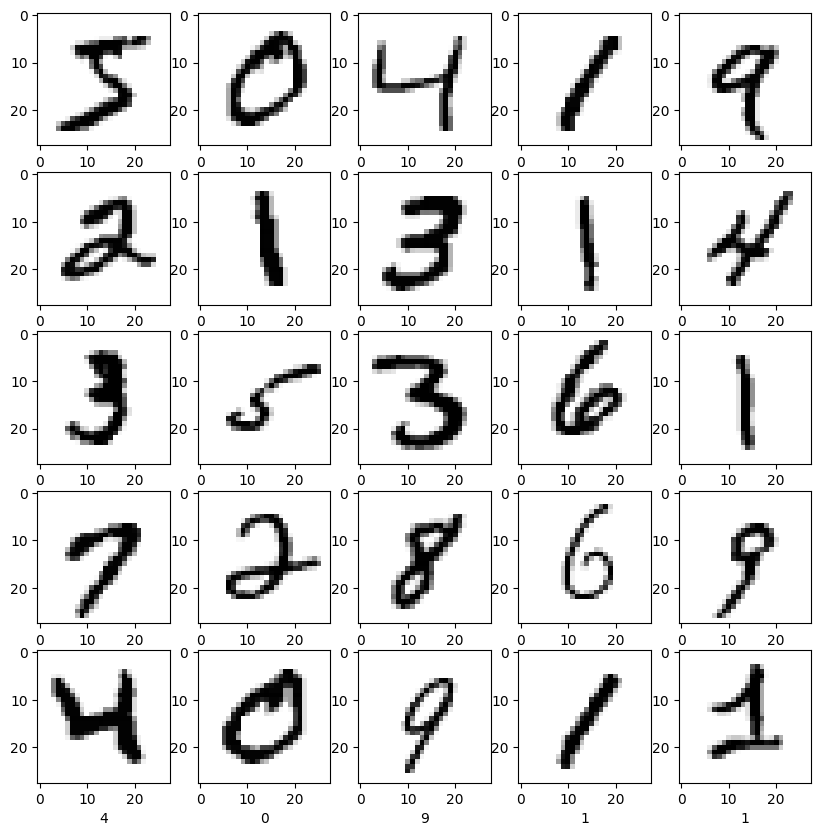

In [6]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap = 'binary')
  plt.xlabel(train_labels[i])

In [7]:
# Criando o modelo com keras
model = keras.Sequential([
    # Camada de entrada Flatten para transformar a matriz de 28x28 para um vetor de 784
    keras.layers.Flatten(input_shape=(28,28)),
    # Camada Oculta Densa (totalmente conectada) de 128 neuronios, com funçao de ativação Relu
    keras.layers.Dense(128, activation = tf.nn.relu),
    # Camada de saida Densa de 10 neuronios, com funçao de ativaçao softmax
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Compila o modelo com fuçao Loss e metrica de acuracia
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Mostra o modelo compilado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Treina o modelo, com 5 épocas
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2492 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1182 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9834


In [10]:
# Testa e mostra as métricas
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9761
0.08242367953062057
0.9761000275611877


# **CNN**

In [11]:
# Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU 
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', 
                                activation ='relu', input_shape=(28,28,1)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade 
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels. 
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número 
# de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Adiciona uma camada de convolução 2D com 64 filtros de tamanho 5x5, que usa a função de ativação ReLU 
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e um único canal de cor (escala de cinza).
model2.add( keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', 
                                activation ='relu', input_shape=(28,28,1)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade 
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels. 
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número 
# de parâmetros e a extrair as características mais importantes da imagem
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

# Adiciona uma camada de 1024 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(1024, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula 
# as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(10, activation='softmax'))

# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa 
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [12]:
# Treinando nosso modelo!
model2.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0960 - accuracy: 0.9699
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0358 - accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9951


In [13]:
# Vamos expandir as dimensões da imagem para verificação de acerto depois
# de colocar o modelo a prova 
test_images = (np.expand_dims(test_images,3))
test_images.shape

(10000, 28, 28, 1)

In [14]:
# Vamos testar o modelo!
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9761
0.08242367953062057
0.9761000275611877


In [15]:
# Agora vamos por o modelo a prova! Vamos passar imagens e ele vai nos dizer o que é
predictions = model.predict(test_images)
print("Score para o objeto #0 no teste: ")
print(predictions[0])
print("Classe predita = " +str(np.argmax(predictions[0])))

313/313 [==============================] - 1s 2ms/step
Score para o objeto #0 no teste: 
[1.1162196e-11 9.0481794e-13 7.5905717e-08 1.6351205e-06 2.4093825e-14
 1.9897295e-10 6.7416676e-17 9.9999833e-01 9.7898134e-10 1.1429032e-08]
Classe predita = 7


In [25]:
# Funções para facilitar a visualização
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))
  
def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i]
   plt.grid(False)
   plt.xticks(range(10),range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

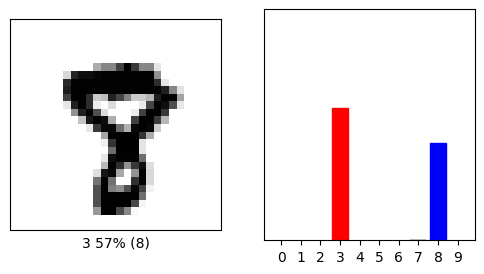

In [29]:
# Agora vamos avaliar os numeros que ele errou
i = 233 # Substitua por um dos indices apontados na celula anterior!
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images[:,:,:,0])
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [28]:
# Vamos verificar quais as imagens que o nosso modelo errou
predictions = model.predict(test_images)
for i in range(500):
  if(np.argmax(predictions[i]) != test_labels[i]):
    print(i)

313/313 [==============================] - 1s 2ms/step
115
233
247
259
274
320
321
445
448
